In [1]:
""" First close look at eye tracking, statistics, heatmaps ,etc.

Is looking predictive of where draw?

"""

' First close look at eye tracking, statistics, heatmaps ,etc.\n\nIs looking predictive of where draw?\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
DATE = 220606
DATE = 231116
# DATE = 220901
animal = "Pancho"

In [4]:
DATE = 230630
animal = "Diego"

In [6]:
MS = load_mult_session_helper(DATE, animal)


Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/lucas/mnt/Freiwald/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onsets_using_rs4_ea

KeyboardInterrupt: 

In [5]:
save_dir = f'/data4/dan/saved_ms/{DATE}.pkl'
if not os.path.exists(save_dir):
    MS = load_mult_session_helper(DATE, animal)
    with open(save_dir,'wb') as f:
        pickle.dump(MS,f)
else:
    with open(save_dir,'rb') as f:
        MS = pickle.load(f)

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
session:  0
Beh Sessions that exist on this date:  {230630: [(1, 'primsingridfixed6fDiego')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['primsingridfixed6fDiego']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*230630*/**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/230630/Diego-230630-124955
Searching using this string:
/home/lucas/mnt/Freiwald/kgupta/neural_data/*Diego*/*230630*/*Diego*230630**
Found this many paths:
1
---
/home/lucas/mnt/Freiwald/kgupta/neural_data/Diego/230630/Diego-230630-124955
These durations gotten for sessions...
...  _durations_each_sess_using_tank : [14115.359024]
...  onsets_using_rs4_ea

FileNotFoundError: [Errno 2] No such file or directory: '/data4/dan/saved_ms/230630.pkl'

# [GOOD] Clusterfix wrapper for extraction (written by Kedar)

### Extract from raw

In [ ]:
# Notes, sanity checks of this code by me. Looking closely through:
# 1. extract_and_save_clusterfix_trial_xy_mats - DONE
# 2. self.extract_and_save_clusterfix_results_mat() - NOT DONE
# 3. self.extract_and_save_clusterfix_trial_fixsacc_csvs() - NOT DONE

# NOTE: sanity checka fter, pllotting results over raw , looks good.

In [ ]:
if False: # Make this "True" if you actualyl want to extract. This takes time...
    for sn in MS.SessionsList:
        sn.extract_and_save_clusterfix_results()

### First, sanity chekc that fixations from this dataset are closely preceded by saccades (~0.1 ms sacc durations). This is just for you, to be confident in extracted data.

In [7]:
sn = MS.SessionsList[0]

trial = sn.get_trials_list()[0]

##### Go thru all trials, and get global distribution over saccade durations

In [ ]:
# Get fixation and saccade pairs
saccade_durations = []
trials_bad_saccs = []

for trial in sn.get_trials_list():
    times_fix, data_centroids = sn.events_get_clusterfix_fixation_times_and_centroids(trial)
    times_saccon =sn.events_get_clusterfix_saccade_times(trial, on_or_off=True)

    times_fix = np.array(times_fix)
    times_saccon = np.array(times_saccon)

    # inds_keep_fix = None
    # inds_keep_sacc = None
    inds_keep_fix = list(range(len(times_fix)))
    inds_keep_sacc = list(range(len(times_saccon)))
    if len(times_fix)==len(times_saccon):
        if times_fix[0] - times_saccon[0]>0:
            # good
            pass
        else:
            # shifted
            inds_keep_fix = inds_keep_fix[1:]
            inds_keep_sacc = inds_keep_sacc[:-1]
    elif len(times_fix)==len(times_saccon)+1:
        inds_keep_fix = inds_keep_fix[1:]
    elif len(times_fix)==len(times_saccon)-1:
        inds_keep_sacc = inds_keep_sacc[:-1]
    else:
        print(len(times_fix))
        print(len(times_saccon))
        print(times_fix)
        print(times_saccon)
        
        fig, ax = plt.subplots()
        ax.plot(times_saccon, times_fix, "ok")
        ax.plot([0, 10], [0, 10])

        assert False

    # take final 
    times_fix = times_fix[inds_keep_fix]
    times_saccon = times_saccon[inds_keep_sacc]

    
    # sanity check that fixations occur consistenyl and shortly after saccs
    assert len(times_saccon) == len(times_fix)
    assert np.all((times_fix - times_saccon)>0)
    if np.any((times_fix - times_saccon)>0.3):
    # this would be really bad. 
        trials_bad_saccs.append(trial)
        continue
    saccade_durations.extend(times_fix - times_saccon)
fig, axes = plt.subplots(1,2, figsize=(8,4))

ax=axes.flatten()[0]
ax.hist(saccade_durations, bins=50, log=False)
ax.set_xlabel("saccade duration (fixtime - sacctime)")
ax.set_title("Cases >~0.2 are missed clusterfix detections")

ax=axes.flatten()[1]
ax.hist(saccade_durations, bins=50, log=True)
ax.set_xlabel("saccade duration (fixtime - sacctime)")
ax.set_title("log")
MAX_SACC_DUR = 0.2
frac_toolong_saccades = sum(np.array(saccade_durations)>MAX_SACC_DUR)/len(saccade_durations)
print(f"This fraction of saccades had duration longer than {MAX_SACC_DUR}: {frac_toolong_saccades}")
np.max(times_fix - times_saccon)

print("Confirm by eye that most fixations are preceded by saccade less than ~150ms before it.")
print("Trials with bad saccs (over 0.3s)")
print(trials_bad_saccs)
print('Fraction',len(trials_bad_saccs)/len(sn.get_trials_list()))

### Assign each fixation to a shape x loc


In [20]:
trialcode = "230630-1-997"
trial = sn.datasetbeh_trialcode_to_trial(trialcode)
trialcode2 = sn.datasetbeh_trial_to_trialcode(trial)

print(trialcode, trialcode2)

230630-1-997 230630-1-997


230630-1-360
359
This is 10th percentile of rms diff between ml2 and tdt pix values.. lower the better
[1.09699327]


,idx_fixation,time_global,fix_cen,closest_task_token_dist,closest_task_token_idx,assigned_task_shape,assigned_task_gridloc,assigned_task_idx_task_orig,assigned_task_token,distance_to_each_token
0,0,2.681427,"[-153.77460915976403, 1.88909342723262]",7.230359,2,arcdeep-4-3-0,"(-1, 0)",2,"{'orient_string': 'undef', 'shapeabstract': 'a...","{(-1, 1): 149.10762049681853, (1, 1): 324.1309..."
1,1,2.881465,"[115.62891154062783, 202.61523687212116]",17.260474,1,line-8-1-0,"(1, 1)",1,"{'orient_string': 'horiz', 'shapeabstract': 'l...","{(-1, 1): 238.69585327360352, (1, 1): 17.26047..."
2,2,3.101508,"[-126.73690743999995, 146.59640247821525]",10.436549,0,V-2-2-0,"(-1, 1)",0,"{'orient_string': 'undef', 'shapeabstract': 'V...","{(-1, 1): 10.436549488936878, (1, 1): 225.2395..."
3,3,3.356557,"[113.57199742182046, 192.77622891801053]",26.860897,1,line-8-1-0,"(1, 1)",1,"{'orient_string': 'horiz', 'shapeabstract': 'l...","{(-1, 1): 234.54788493606003, (1, 1): 26.86089..."
4,4,3.621608,"[390.95873031364965, 137.272504162217]",168.096036,1,FAR_FROM_ALL_SHAPES,FAR_FROM_ALL_SHAPES,FAR_FROM_ALL_SHAPES,"{'orient_string': 'horiz', 'shapeabstract': 'l...","{(-1, 1): 507.3449209762509, (1, 1): 168.09603..."
5,5,3.866656,"[-3.1940607869070616, -1.1323381715363268]",119.978215,2,FAR_FROM_ALL_SHAPES,FAR_FROM_ALL_SHAPES,FAR_FROM_ALL_SHAPES,"{'orient_string': 'horiz', 'shapeabstract': 'l...","{(-1, 1): 185.75569830338569, (1, 1): 238.2189..."
6,6,4.066694,"[146.31161704353536, 220.03229209269676]",0.807400,1,line-8-1-0,"(1, 1)",1,"{'orient_string': 'horiz', 'shapeabstract': 'l...","{(-1, 1): 272.796800224696, (1, 1): 0.80739990..."
7,7,4.266733,"[-143.08107295344823, 38.07003456170319]",25.374862,2,arcdeep-4-3-0,"(-1, 0)",2,"{'orient_string': 'undef', 'shapeabstract': 'a...","{(-1, 1): 111.40761278030371, (1, 1): 292.5635..."


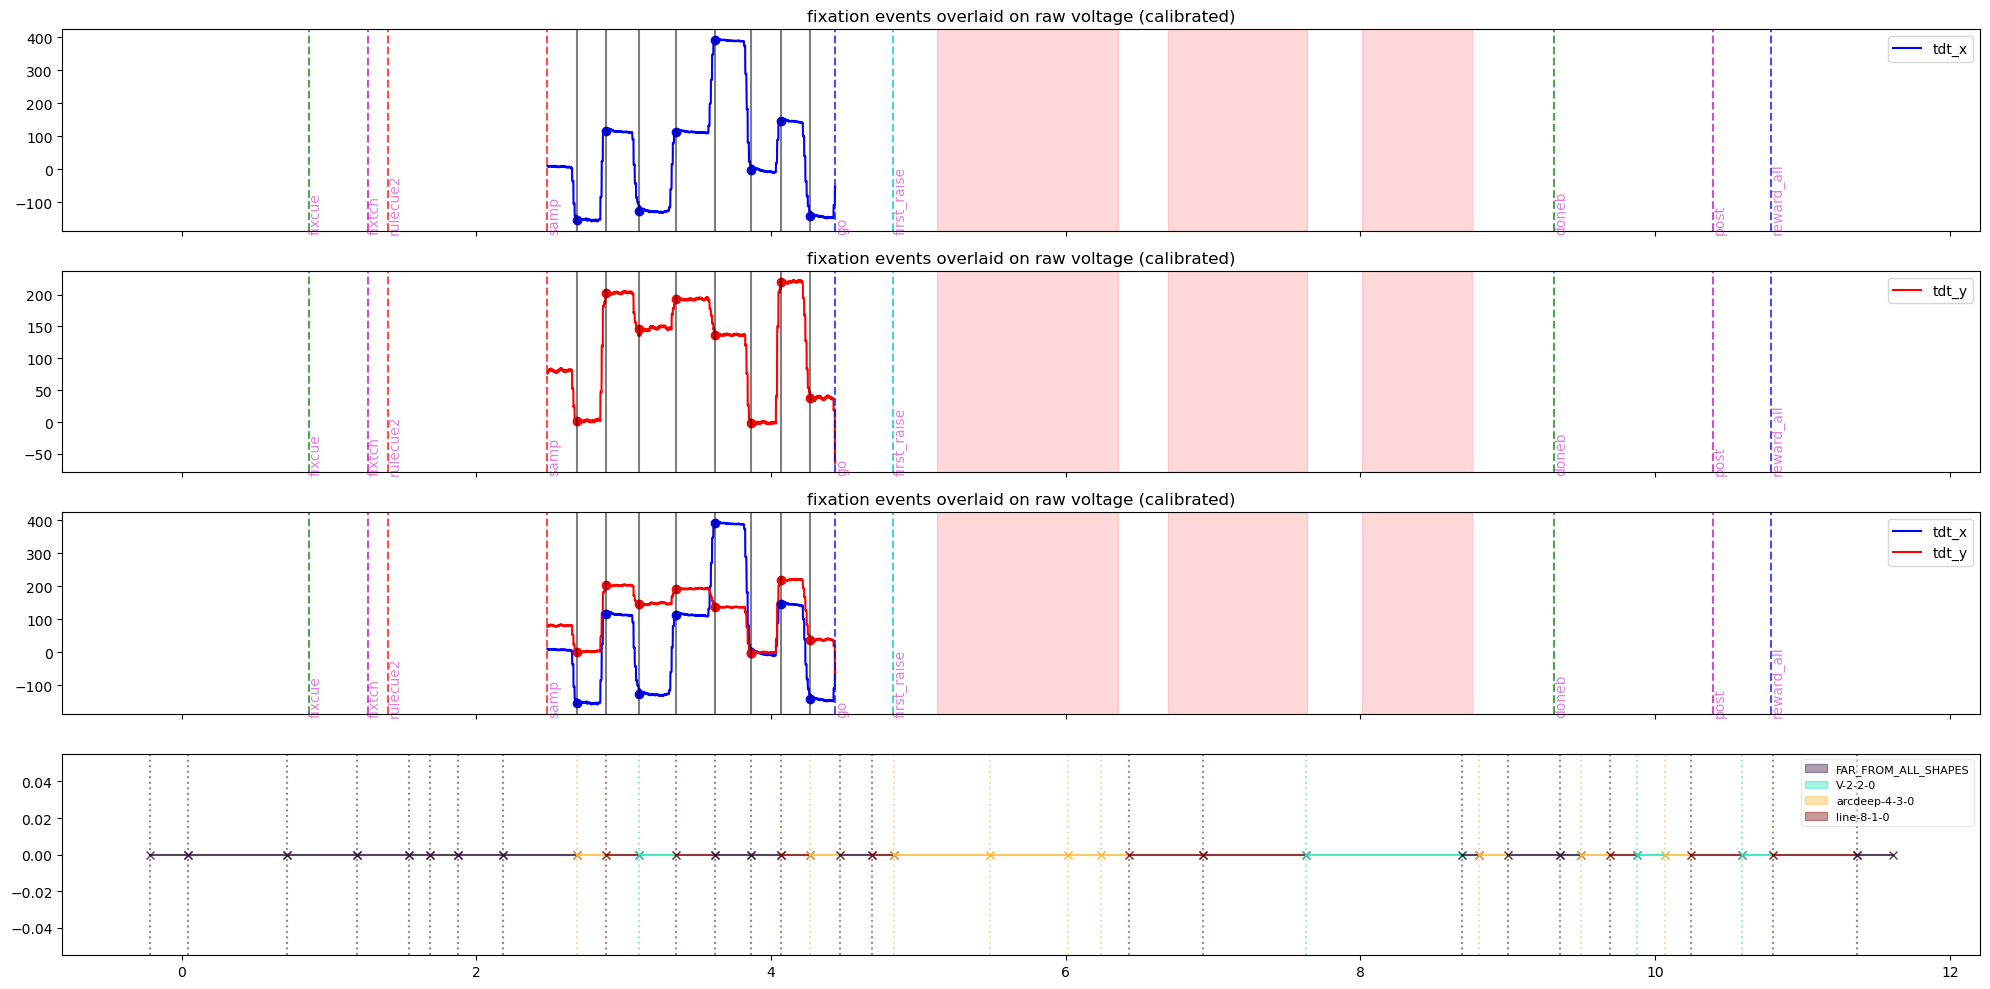

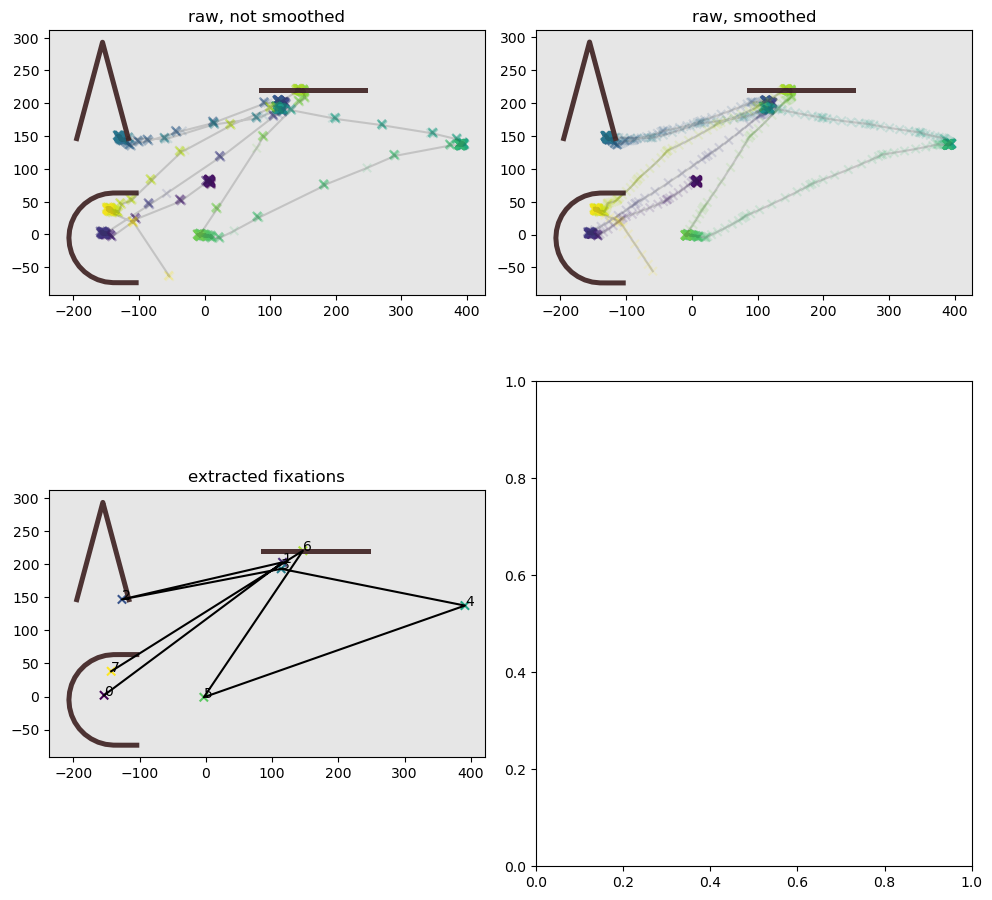

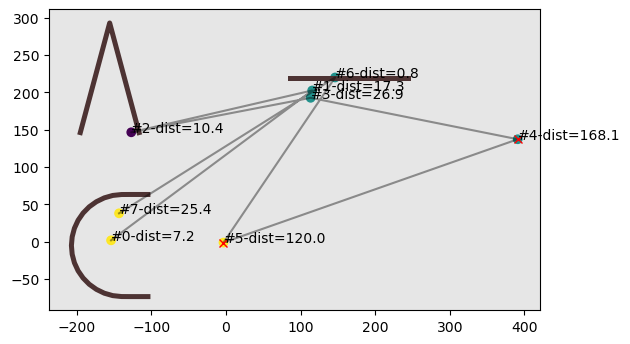

In [51]:
# [GOOD PLOTS] Run for a single trial, making example plots
if False:
    trials = sn.get_trials_list()
    trial = trials[1]
else:
    trialcode = "230630-1-360"
    trial = sn.datasetbeh_trialcode_to_trial(trialcode)    

print(trialcode)
print(trial)
fig_savedir = "/tmp"
# dffix = sn.beh_eye_fixation_extract_and_assign_task_shape(trial, event_endpoints=["stim_onset", "go"], PLOT=True)
dffix, fig, ax = sn.beh_eye_fixation_extract_and_assign_task_shape(trial, event_endpoints=["stim_onset", "go"], 
                                                                   PLOT=True, fig_savedir=fig_savedir)
display(dffix)

In [ ]:
for k, v in dffix["distance_to_each_token"].items():
    print(k, " --- ", v)

In [ ]:
for k, v in dffix["distance_to_each_token"].items():
    print(k, " --- ", v)

In [ ]:
# Collect across all data
trials = sn.get_trials_list()

list_df = []
for t in trials:
    print(t)
    dffix = sn.beh_eye_fixation_extract_and_assign_task_shape(t, event_endpoints=["stim_onset", "go"], PLOT=False)
    
    dffix["trialcode"] = sn.datasetbeh_trial_to_trialcode(t)
    
    list_df.append(dffix)
import pandas as pd
DFfix = pd.concat(list_df)

In [ ]:
print("All fixations: ")
display(DFfix)

# To save, for Dolnik, removing custom classes

In [ ]:
DFfix = DFfix.drop(["assigned_task_token"], axis=1)


In [ ]:
path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Dolnik/{animal}-{DATE}-fixations.pkl"
DFfix.to_pickle(path)

In [ ]:
DFfix

# Load and quick plots of eye

### (1) Neurally acquired eye tracking

In [ ]:
SN = MS.SessionsList[0]

In [ ]:
SN._CachedTrialOnset

In [ ]:
trials = SN.get_trials_list(True)
trials

In [ ]:
# SN.plot_stream(trial=trials[0], which="eyex")
SN.plot_stream(trial=trials[0], which="eyex")

### (2) Beh (monkeylogic) acquired eye data

In [ ]:
SN.load_behavior()

In [ ]:
# Developiung code to optimize alignment beween tdt and ml2.
times_tdt, vals_tdt, fs_tdt, times_ml2, vals_ml2, fs_ml2, fd = SN._beh_extract_eye_raw(100)
vals_tdt_calibrated = SN._beh_extract_eye_calibrate_raw(vals_tdt, fd)

SN._BehEyeAlignOffset = None

SN._beh_extract_eye_return_alignment_offset()

In [ ]:
%matplotlib inline
CHECK_TDT_ML2_MATCH = True
apply_empirical_offset = True
return_all = False
times_tdt, vals_tdt_calibrated = SN.beh_extract_eye_good(trials[100], CHECK_TDT_ML2_MATCH=CHECK_TDT_ML2_MATCH, PLOT=True, 
                                                         apply_empirical_offset=apply_empirical_offset, return_all=return_all)

In [ ]:
apply_empirical_offset = True
PLOT = False
CHECK_TDT_ML2_MATCH = True
for trial in SN.get_trials_list(True)[::10]:
    print(trial)
    times_tdt, vals_tdt_calibrated = SN.beh_extract_eye_good(trial, CHECK_TDT_ML2_MATCH=CHECK_TDT_ML2_MATCH, PLOT=PLOT, apply_empirical_offset=apply_empirical_offset)

### [FOR KEDAR] load eye tracking and plot over behavior

In [ ]:
def _plot_eye_trace(times, vals, ax, color="b"):
    ax.plot(vals[:,0], vals[:,1], "-k", alpha=0.3)
    ax.scatter(vals[:,0], vals[:,1], c=times, alpha=0.5, marker="o")    


In [ ]:
################ PARAMS
sn = MS.SessionsList[0]
PLOT_SM = True # smoothed?
trial = sn.get_trials_list(True)[-1]


In [ ]:

############### RUN
times_tdt, vals_tdt_calibrated, fs_tdt, vals_tdt_calibrated_sm = sn.beh_extract_eye_good(trial, PLOT=True, return_all=True);

if PLOT_SM:
    VALS = vals_tdt_calibrated_sm
else:
    VALS = vals_tdt_calibrated
    
############### 1) Plot during planning
# Overlay on task and beh
fig, ax = plt.subplots()
sn.plot_taskimage(ax, trial)

# sn.Datasetbeh.plot_strokes([VALS], ax)
# _plot_eye_trace(VALS, ax, "r")

# keep just times during "planning"
dict_event_times = sn.events_get_time_sorted(trial)[0]
t1 = dict_event_times["stim_onset"]
t2 = dict_event_times["go"]

inds = (times_tdt>=t1) & (times_tdt<=t2)
times_this = times_tdt[inds]
vals_this = VALS[inds]

# sn.Datasetbeh.plot_strokes([vals_this], ax, single_color="r", alpha=0.5)
_plot_eye_trace(times_this, vals_this, ax)

############### 2) Plot during strokes
# Overlay on task and beh
fig, ax = plt.subplots()
sn.plot_taskimage(ax, trial)


dict_event_times = sn.events_get_time_sorted(trial)[0]
ons, offs = sn.strokes_extract_ons_offs(trial)
t1 = dict_event_times["go"]
t2 = offs[-1]

inds = (times_tdt>=t1) & (times_tdt<=t2)
times_this = times_tdt[inds]
vals_this = VALS[inds]

# sn.Datasetbeh.plot_strokes([vals_this], ax, single_color="r", alpha=0.5)
_plot_eye_trace(times_this, vals_this, ax)


In [ ]:
# Extract task stroke shapes, including their locations, etc.
ind = sn.datasetbeh_trial_to_datidx(trial)
tokens_task = sn.Datasetbeh.taskclass_tokens_extract_wrapper(ind, "task", plot=True)
tokens_beh = sn.Datasetbeh.taskclass_tokens_extract_wrapper(ind, "beh", plot=False)


In [ ]:
# Tokens holds each prim (either beh or task) as a discrete object

# This gives useful features for the first prim in the task
tokens_task[0]

In [ ]:
### to get times of events in the trial:
dict_event_times = sn.events_get_time_sorted(trial)

# - you can pick events form tjhis list:
print(sn.events_default_list_events())

# -- such as this:
dict_event_times = sn.events_get_time_sorted(trial, list_events=['samp', 'go', 'first_raise'])
print(dict_event_times)

### to get times of strokes
ons, offs = sn.strokes_extract_ons_offs(trial)
print(ons, offs)

In [ ]:
# To get spatial coordinates of task strokes
sn.strokes_task_extract(trial)

# [For Dan Hanuska] making single trial plots combining eye fixations, hand track, and drawing sequence (grammar)

In [ ]:
# Based on the plot I made with moment-by-moment decode and eye tracking overlaid.
# You can find that plot here: neuralmonkey.analyses.decodemoment.plot_single_trial_combine_signals_wrapper
# The below pulls out the essential stuff.

In [ ]:
# from pythonlib.globals import PATH_HANDTRACK
expt = 'grampancho1'
PATH_HANDTRACK = f'/home/danhan/freiwaldDrive/dhanuska/handtrack_processed/{animal}/{DATE}_{expt}/processed_data.pkl'
with open (PATH_HANDTRACK, 'rb') as f:
    ht_dat_all = pickle.load(f)

from drawmonkey.tools.ht_preprocess import preprocess_merge
from pythonlib.tools.stroketools import strokesInterpolate2
ht_dat = preprocess_merge(ht_dat_all,'220914_f12_dlc')

for trial,d_trial in ht_dat.items():
    if d_trial['skipped'] is None:
            cam_fs = 1/np.mean(np.diff(d_trial['trans_pts_time_cam_all']))
            ht_dat[trial]['trans_pts_time_cam_all_int'] = strokesInterpolate2([d_trial['trans_pts_time_cam_all']],kind='linear',N=["fsnew",1000,cam_fs])[0]

from drawmonkey.tools.preprocess import loadSingleDataQuick, getSessionsList
fd = loadSingleDataQuick(animal,DATE,expt,1)

In [ ]:
ht_dat[140].keys()

In [ ]:
# Extract each kind of behavioral data
# - All will by default use identical timebases (behavior monkeylogic)
from pythonlib.tools.camtools import plotTrialsTrajectories
from drawmonkey.tools.utils import getTrialsStrokesByPeanuts 

### User input
# Take a ssession
SN = MS.SessionsList[0]

# Input a trial
trials = list(range(100,300))
fig_save_dir = f'/home/danhan/Documents/eyetrack_figs/{animal}/{DATE}'
os.makedirs(fig_save_dir,exist_ok=True)
for trial in trials:
    ### Runs
    fig, axes = plt.subplots(3, 1, figsize=(40, 20), sharex = True)

    ### (0) Plot handtrack data
    ax = axes.flatten()[0]
    pts_cam = ht_dat[trial]['trans_pts_time_cam_all']
    if ht_dat[trial+1]['skipped'] is not None or len(getTrialsStrokesByPeanuts(fd, trial))==0:
        #Skip trials with no HT data
        continue
    plotTrialsTrajectories(fd,ht_dat,trial,ax)
    dffix, map_shape_to_y, map_shape_to_col = SN.beh_eye_fixation_task_shape_overlay_plot(trial, ax, yplot=0)


    xmin,xmax = plt.xlim()

    ### (1) Plot eye tracking beh
    ax = axes.flatten()[1]
    # convert neural trial to trialcode
    trialcode = SN.datasetbeh_trial_to_trialcode(trial)

    # (1) Raw eye tracking (optional)
    SN.beh_plot_eye_raw_overlay_good(trial, ax)
    if False: # To get the raw
        CHECK_TDT_ML2_MATCH = True
        PLOT = False
        times_tdt, vals_tdt_calibrated = SN.beh_extract_eye_good(trials[100], CHECK_TDT_ML2_MATCH=CHECK_TDT_ML2_MATCH, PLOT=PLOT, 
                                                                apply_empirical_offset=apply_empirical_offset, return_all=return_all)

    # (2) Overlay events of interest
    SN.plotmod_overlay_trial_events(ax, trial)

    # (3) Eye fixations
    dffix, map_shape_to_y, map_shape_to_col = SN.beh_eye_fixation_task_shape_overlay_plot(trial, ax, yplot=-700)
    if False: # To get the raw
        dffix = DFfix[DFfix["trialcode"] == trialcode].reset_index(drop=True) 
        print("The fixation onsets and their beh labels: ")
        display(dffix.loc[:, ["idx_fixation", "time_global", "assigned_task_shape", "assigned_task_gridloc"]])

    # (3) Drawing sequence (grammar stuff)
    # TODO: Add in relevant code that works with D, from 250306_dataset_behavior_tutorial_dan.ipynb
    D = SN.Datasetbeh

    ### (2) Plot example nerual rasters
    ax = axes.flatten()[2]
    bregion = "preSMA"
    sites = SN.sitegetterKS_map_region_to_sites(bregion)
    SN.plot_raster_sites(ax, trial, sites, overlay_trial_events=True)

    # Plot a legend of what the eye track colors map to
    from pythonlib.tools.plottools import legend_add_manual
    # fig, ax = plt.subplots()
    legend_add_manual(ax, map_shape_to_col.keys(), map_shape_to_col.values())

    # (5) Plot the drawing and image
    sn.datasetbeh_plot_example_drawing(trial)
    plt.setp(ax, xlim=(xmin,xmax))
    fig.savefig(f'{fig_save_dir}/{trial}.png')
    plt.close('all')
